# [ EXPLORATION CELL ]

## Hello data, who are you?

In [ ]:
import pandas as pd

# --- EXPLORATION CELL ---
# Load your dataset as df
df= pd.read_csv('data/properties.csv')

# How big are ya? Number of observations & features
print("Number of observations:", df.shape[0])
print("Number of features:", df.shape[1])

# What do you look like? First 5 rows
#print(df.head())

# Do you have any duplicates?
duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

# Do you have any missing values?
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(f"Columns with missing values: {len(columns_with_missing_values)} out of {df.shape[1]}")

percent_missing = (columns_with_missing_values / df.shape[0]) * 100
percent_missing_sorted = percent_missing.sort_values(ascending=False)
print("Index", "| Feature |", "| Missing values |", sep="\t")
for index, (feature, percent) in enumerate(percent_missing_sorted.items(), start=1):
    print(index, feature, f"{percent:.2f}%", sep="\t")


Number of observations: 75511
Number of features: 30
Number of duplicates: 0
Columns with missing values: 10 out of 30
Index	| Feature |	| Missing values |
1	cadastral_income	59.55%
2	surface_land_sqm	48.01%
3	construction_year	44.22%
4	primary_energy_consumption_sqm	35.18%
5	nbr_frontages	34.89%
6	latitude	18.67%
7	longitude	18.67%
8	terrace_sqm	17.40%
9	total_area_sqm	10.08%
10	garden_sqm	3.89%


In [ ]:
# --- EXPLORATION CELL ---
print(df.columns) # get column names

Index(['price', 'property_type', 'subproperty_type', 'region', 'province',
       'locality', 'zip_code', 'latitude', 'longitude', 'construction_year',
       'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 'nbr_bedrooms',
       'equipped_kitchen', 'fl_furnished', 'fl_open_fire', 'fl_terrace',
       'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool',
       'fl_floodzone', 'state_building', 'primary_energy_consumption_sqm',
       'epc', 'heating_type', 'fl_double_glazing'],
      dtype='object')


# [ ACTION CELL ]

## Action no. 1: Dropping columns (type: cleaning)

- we drop columns with over 50% missing values
- we drop "ID" because it's not useful

In [ ]:
# -- ACTION CELL --
# Drop columns with more than 50% missing values (for this dataset, it's only one: cadastral_income)
columns_to_drop = percent_missing[percent_missing > 50].index
df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {list(columns_to_drop)}")

# Drop ID columns (for this dataset, it's only one: id)
df.drop(columns="id", inplace=True)

Dropped columns: ['cadastral_income']


# [ ACTION CELL ]

## Action no.2 : Dropping duplicates (type: cleaning)
- dropping duplicates if any, and printing the number of duplicates dropped

In [ ]:
# -- ACTION CELL --

# Drop duplicates, if any
duplicates = df.duplicated().sum()
if duplicates > 0:
    shape_before = df.shape
    df = df.drop_duplicates()
    shape_after = df.shape
    print(f"{duplicates} duplicates removed. Shape before: {shape_before}, Shape after: {shape_after}")
else:
    print("No duplicates found.")

10 duplicates removed. Shape before: (75511, 28), Shape after: (75501, 28)


# [ EXPLORATION CELL ]

## Numerical vs categorical columns

In [ ]:
# -- EXPLORATION CELL --

# How d'ya look post-actions? Number of observations & features
print("Current observations:", df.shape[0])
print("Current features:", df.shape[1])

# How many numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Number of numerical features:", len(numerical_cols))
# How many categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Number of categorical features:", len(categorical_cols), "\n")


Current observations: 75501
Current features: 28
Number of numerical features: 19
Number of categorical features: 9 



# [ EXPLORATION CELL ]

## NUMERICAL DATA


In [ ]:
# -- EXPLORATION CELL, NUMERICAL --
import numpy as np

# Count numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Number of numerical features:", len(numerical_cols))

# Summary statistics for numerical columns only
print(df.describe(include=[np.number]))


Number of numerical features: 19
              price      zip_code      latitude     longitude  \
count  7.550100e+04  75501.000000  61404.000000  61404.000000   
mean   4.227671e+05   5144.724653     50.886610      4.328706   
std    4.383754e+05   3005.411545      0.349741      0.950936   
min    7.600000e+04   1000.000000     25.761680    -80.191790   
25%    2.420000e+05   2240.000000     50.705785      3.764076   
50%    3.290000e+05   4683.000000     50.900902      4.376740   
75%    4.550000e+05   8370.000000     51.148639      4.876499   
max    2.250000e+07   9992.000000     52.434244      6.385048   

       construction_year  total_area_sqm  surface_land_sqm  nbr_frontages  \
count       42115.000000    67886.000000      39252.000000   49156.000000   
mean         1984.413534      163.670315       1157.052838       2.803015   
std            41.522077      415.879075      10117.718774       0.889176   
min          1753.000000        3.000000          0.000000       1.000000

# [ EXPLORATION CELL]

## CATEGORICAL DATA

- Check unique values and frequency of each unique value.
- Explore binning options, if any.
- Explore feature slicing options, if any.

In [ ]:
# -- EXPLORATION CELL, CATEGORICAL-

# Let's see the unique values for each categorical column
for column in categorical_cols:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

property_type: ['APARTMENT' 'HOUSE']
subproperty_type: ['APARTMENT' 'HOUSE' 'DUPLEX' 'VILLA' 'EXCEPTIONAL_PROPERTY' 'FLAT_STUDIO'
 'GROUND_FLOOR' 'PENTHOUSE' 'FARMHOUSE' 'APARTMENT_BLOCK'
 'COUNTRY_COTTAGE' 'TOWN_HOUSE' 'SERVICE_FLAT' 'MANSION'
 'MIXED_USE_BUILDING' 'MANOR_HOUSE' 'LOFT' 'BUNGALOW' 'KOT' 'CASTLE'
 'CHALET' 'OTHER_PROPERTY' 'TRIPLEX']
region: ['Flanders' 'Brussels-Capital' 'Wallonia' 'MISSING']
province: ['Antwerp' 'East Flanders' 'Brussels' 'Walloon Brabant' 'Flemish Brabant'
 'Liège' 'West Flanders' 'Hainaut' 'Luxembourg' 'Limburg' 'Namur'
 'MISSING']
locality: ['Antwerp' 'Gent' 'Brussels' 'Turnhout' 'Nivelles' 'Halle-Vilvoorde'
 'Liège' 'Brugge' 'Sint-Niklaas' 'Veurne' 'Verviers' 'Mechelen'
 'Charleroi' 'Dendermonde' 'Bastogne' 'Leuven' 'Hasselt' 'Mons' 'Aalst'
 'Tournai' 'Oostend' 'Oudenaarde' 'Philippeville' 'Kortrijk' 'Dinant'
 'Ieper' 'Huy' 'Marche-en-Famenne' 'Namur' 'Maaseik' 'Mouscron'
 'Diksmuide' 'Soignies' 'Neufchâteau' 'Arlon' 'Tongeren' 'Waremme' 'Thuin'
 

# [ EXPLORATION CELL ]

## DATAVIZ - understanding data distributions

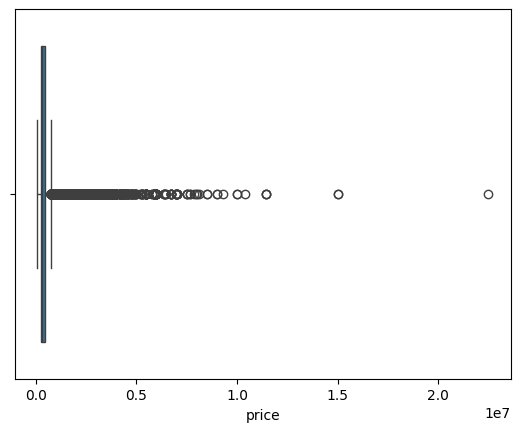

In [ ]:
# -- EXPLORATION CELL, DISTRIBUTIONS --

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='price', data=df)
plt.show()

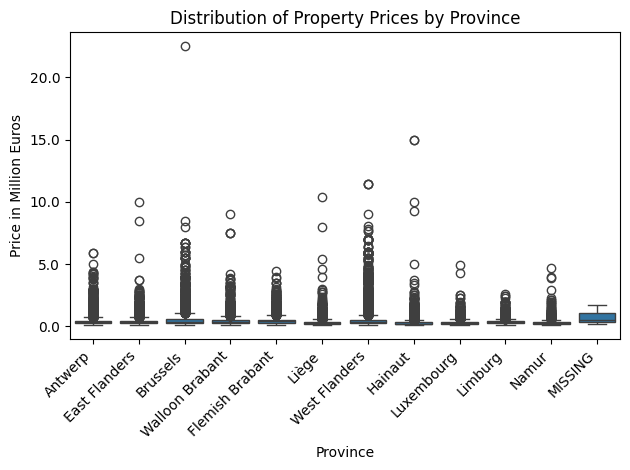

In [ ]:
# -- EXPLORATION CELL, DISTRIBUTIONS --

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Ensure that 'Price' is in numeric format
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='province', y='price', data=df)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Thoughts:

Looking at the graph above, there are TWO massive outliers that stand out: 
- one in Brussels
- one in Hainaut


In [ ]:
# -- EXPLORATION CELL, OUTLIERS --


# Ensure that 'Price' is in numeric format
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# BAD WAY of creating a new df apparently, kept hitting a warning message:
# df_2 = df_1[df_1['Price'] < 14000000]

#This is the GOOD WAY to create a new df with a subset of the original df, by using the .copy() method
df_1 = df[df['price'] <= 14000000].copy()

# Print the number of rows and columns in the new DataFrame
print("Number of observations (rows) WITH outliers:", df.shape[0])
print("Number of observations (rows) WITHOUT outliers:", df_1.shape[0])
print("Number of columns in newest df:", df_1.shape[1])

Number of observations (rows) WITH outliers: 75501
Number of observations (rows) WITHOUT outliers: 75498
Number of columns in newest df: 28


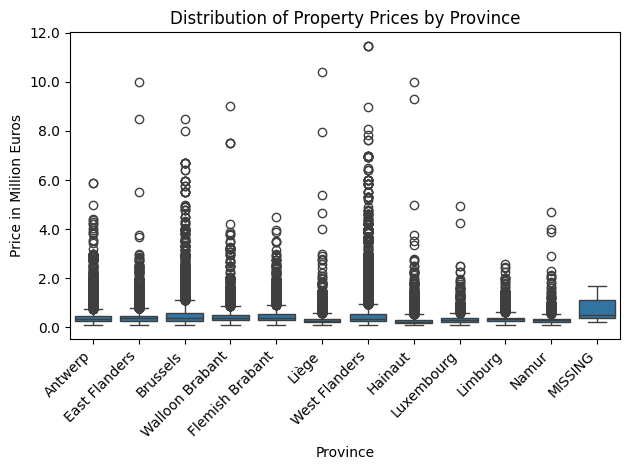

In [ ]:
# Ensure that 'Price' is in numeric format
df_1['price'] = pd.to_numeric(df_1['price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='province', y='price', data=df_1)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Thoughts:

Much more balanced distribution of the data, with no massive outliers.

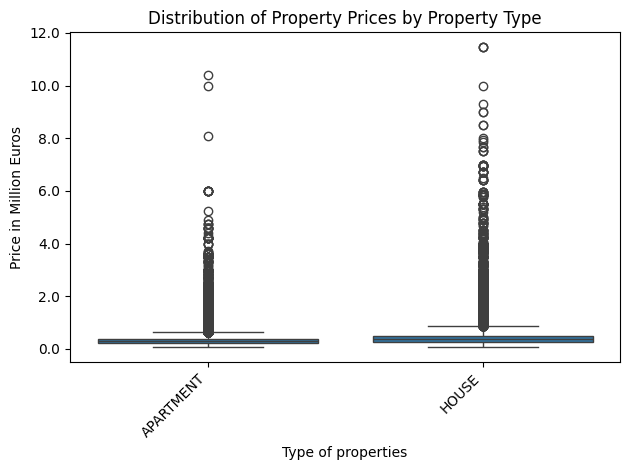

In [ ]:
# Ensure that 'Price' is in numeric format
df_1['price'] = pd.to_numeric(df_1['price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='property_type', y='price', data=df_1)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Type of properties')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Property Type')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

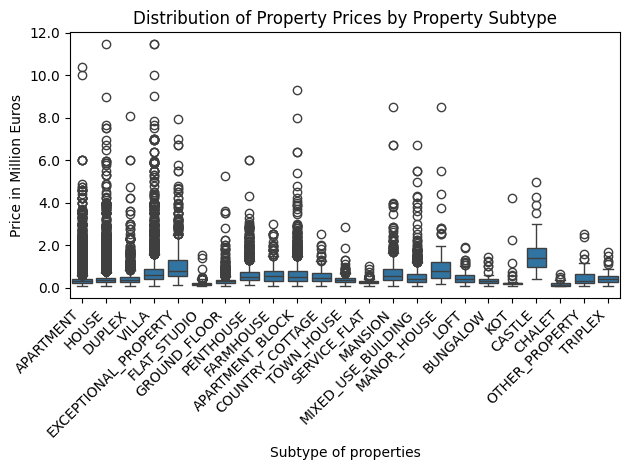

In [ ]:
# Ensure that 'Price' is in numeric format
df_1['price'] = pd.to_numeric(df_1['price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='subproperty_type', y='price', data=df_1)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Subtype of properties')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Property Subtype')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()